slice 1000 or 3D version

In [1]:
%pip install -q imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np
import re
from tqdm import tqdm
from skimage.io import imread
from skimage import filters, transform

In [4]:
image_dir = Path(
    "/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans"
)
!ls "$image_dir"

CD1-15_Z1000-1009  CD1-41_Z1000-1009  CD1-42_Z1000-1009  test_onezslice


In [5]:
!ls "$image_dir/CD1-15_Z1000-1009" | head -n 20

20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1000.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1001.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1002.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1003.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1004.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1005.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1006.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1007.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1008.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1009.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C01_xyz-Table Z1000.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C01_xyz-Table Z1001.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C01_xyz-Table Z1002.tif
20-04-14_ax_4x_3umz_3x3_15o_Dyn5_Ultra

In [ ]:
!ls "$image_dir/CD1-41_Z1000-1009"

In [7]:
!ls "$image_dir/CD1-42_Z1000-1009" | head

17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1000.tif
17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1001.tif
17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1002.tif
17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1003.tif
17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1004.tif
17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1005.tif
17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1006.tif
17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1007.tif
17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1008.tif
17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1009.tif


In [13]:
tile_counts = {
    "CD1-15_Z1000-1009": (3, 3),
    "CD1-41_Z1000-1009": (4, 3),
    "CD1-42_Z1000-1009": (3, 3),
}
patterns = {
    "CD1-15_Z1000-1009": "20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[{row:02d} x {col:02d}]_C{c:02d}_xyz-Table Z1{z:03d}.tif",
    "CD1-41_Z1000-1009": "16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[{row:02d} x {col:02d}]_C{c:02d}_xyz-Table Z1{z:03d}.ome.tif",
    "CD1-42_Z1000-1009": "17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[{row:02d} x {col:02d}]_C{c:02d}_xyz-Table Z1{z:03d}.tif",
}

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009


  0%|          | 0/4 [00:00<?, ?it/s]

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1000.ome.tif


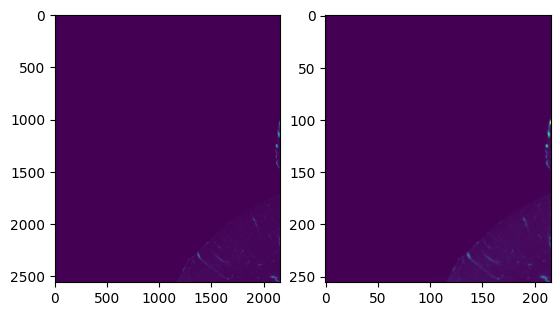

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

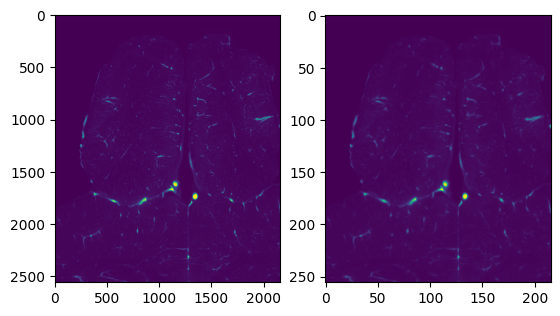

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 01]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 01]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 01]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 01]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 01]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

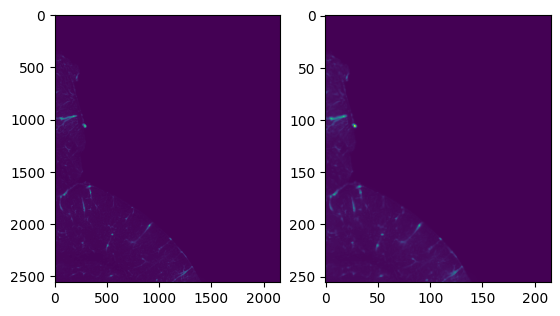

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 02]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 02]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 02]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 02]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[00 x 02]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

 25%|██▌       | 1/4 [00:39<01:58, 39.67s/it]

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1000.ome.tif


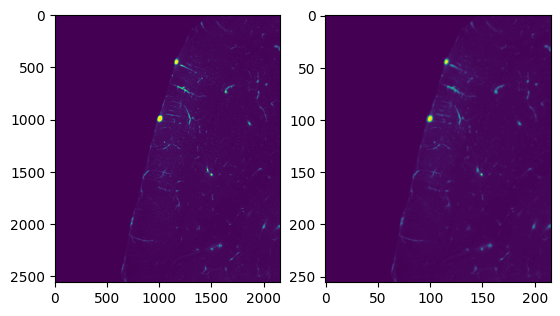

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

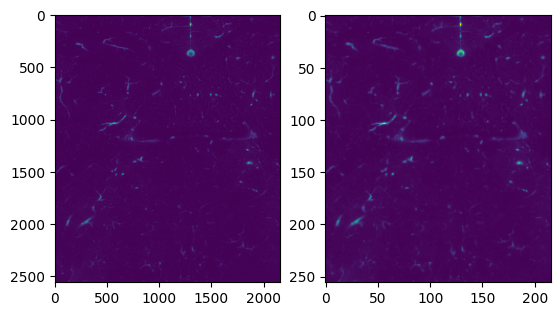

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 01]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 01]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 01]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 01]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 01]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

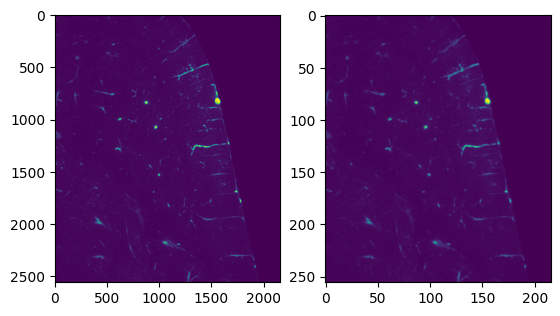

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 02]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 02]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 02]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 02]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[01 x 02]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

 50%|█████     | 2/4 [01:10<01:08, 34.26s/it]

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1000.ome.tif


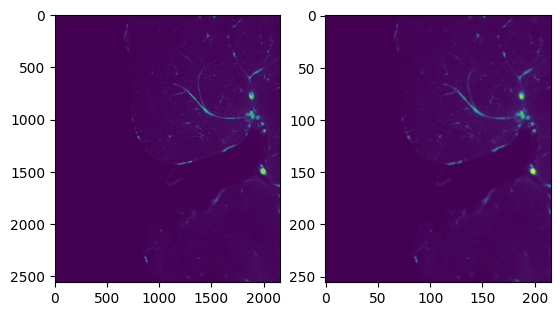

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

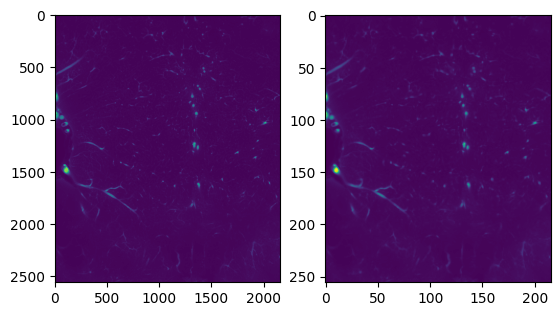

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 01]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 01]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 01]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 01]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 01]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

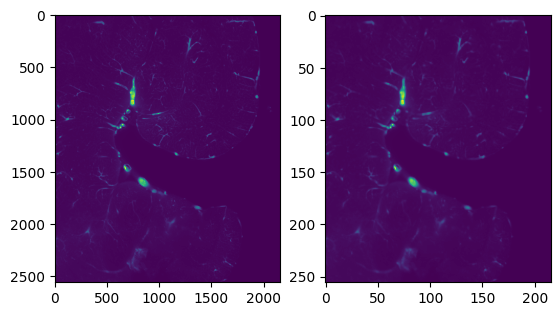

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 02]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 02]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 02]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 02]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[02 x 02]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

 75%|███████▌  | 3/4 [01:43<00:33, 33.87s/it]

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 00]_C00_xyz-Table Z1000.ome.tif


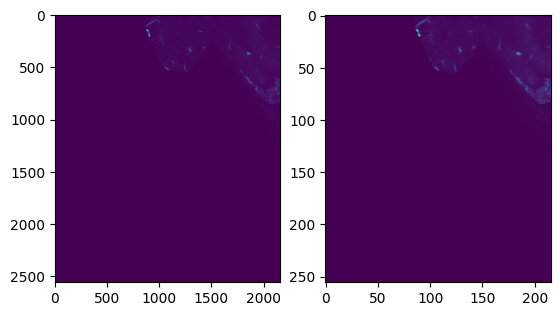

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 00]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 00]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 00]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 00]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 00]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

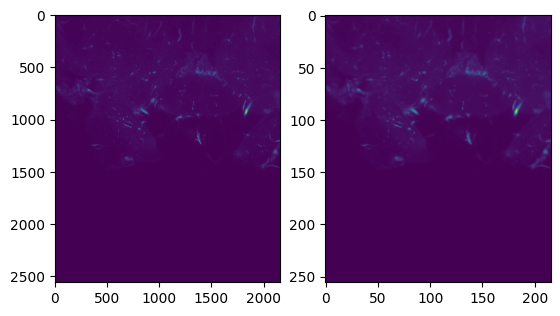

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 01]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 01]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 01]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 01]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 01]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

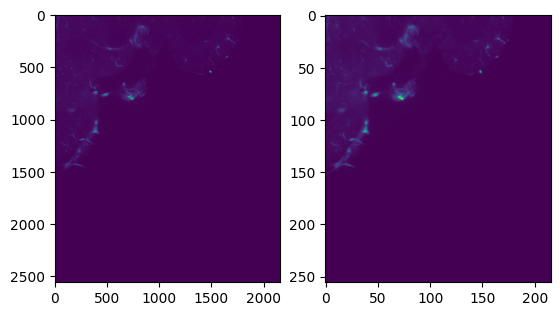

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 02]_C00_xyz-Table Z1001.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 02]_C00_xyz-Table Z1002.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 02]_C00_xyz-Table Z1003.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 02]_C00_xyz-Table Z1004.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-41_Z1000-1009/16-20-46_ax_4x_3x4_15o_3umz_multi_UltraII[03 x 02]_C00_xyz-Table Z1005.ome.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mou

100%|██████████| 4/4 [02:13<00:00, 33.29s/it]


/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009


  0%|          | 0/3 [00:00<?, ?it/s]

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1000.tif


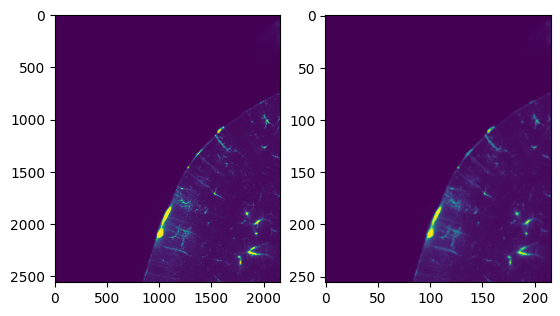

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 00]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/C

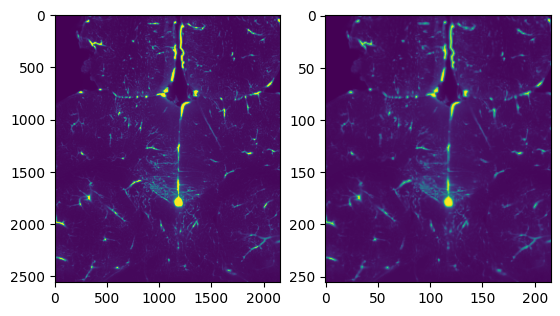

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 01]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 01]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 01]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 01]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 01]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/C

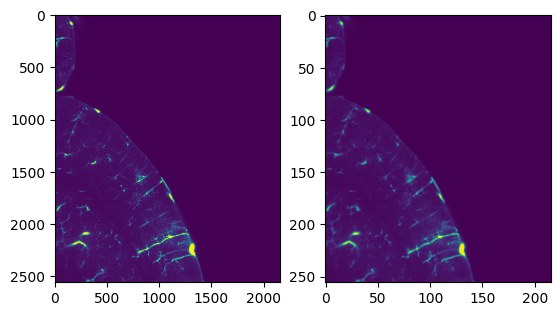

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 02]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 02]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 02]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 02]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[00 x 02]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/C

 33%|███▎      | 1/3 [01:13<02:27, 73.66s/it]

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1000.tif


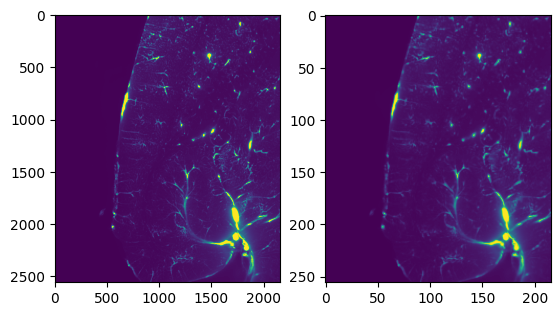

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 00]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/C

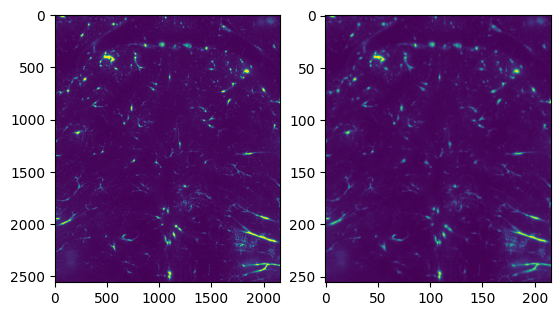

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 01]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 01]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 01]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 01]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 01]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/C

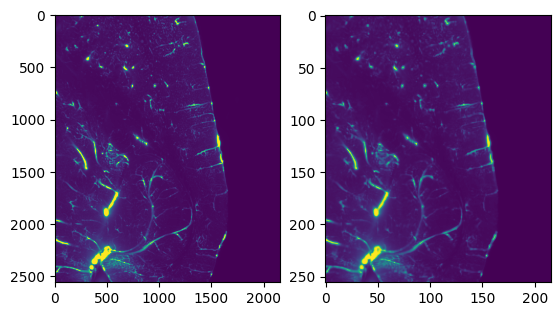

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 02]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 02]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 02]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 02]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[01 x 02]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/C

 67%|██████▋   | 2/3 [02:23<01:11, 71.36s/it]

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1000.tif


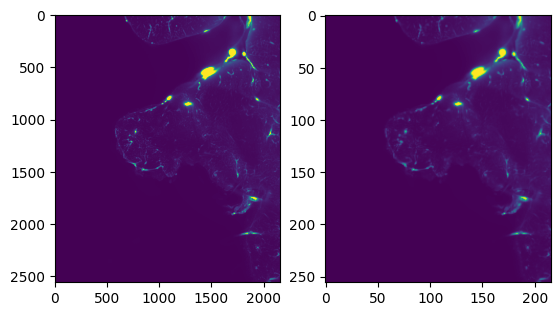

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 00]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/C

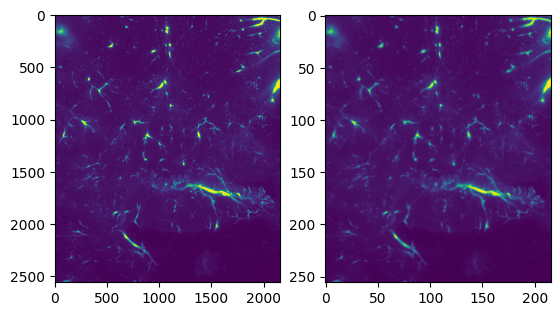

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 01]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 01]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 01]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 01]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 01]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/C

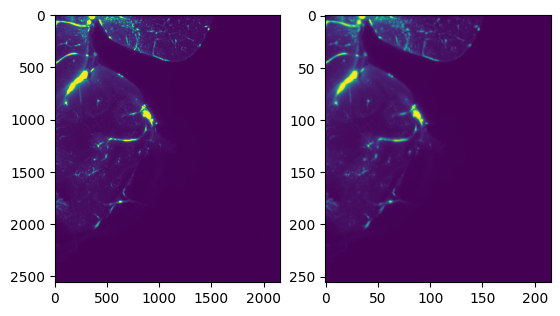

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 02]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 02]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 02]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 02]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-42_Z1000-1009/17-41-38_ax_4x_3x3_10o_3umz_multi_UltraII[02 x 02]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/C

100%|██████████| 3/3 [03:31<00:00, 70.63s/it]


/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009


  0%|          | 0/3 [00:00<?, ?it/s]

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1000.tif


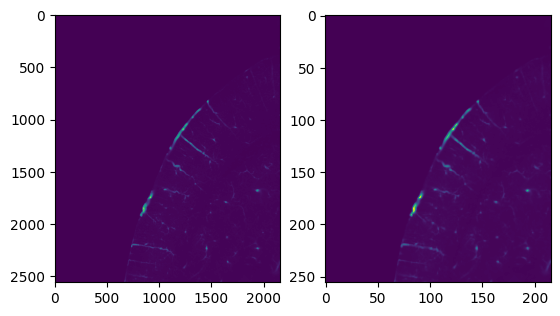

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 00]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15

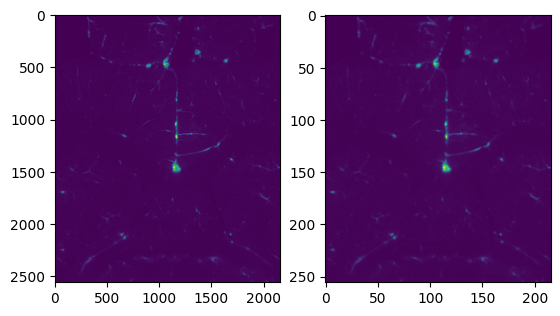

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 01]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 01]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 01]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 01]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 01]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15

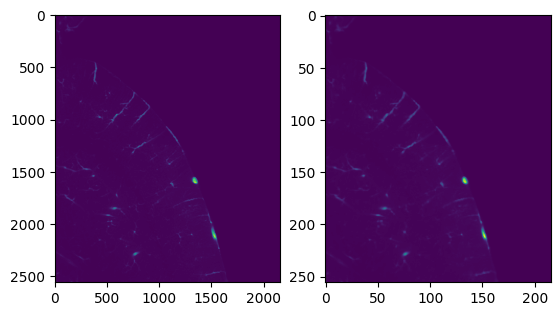

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 02]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 02]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 02]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 02]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[00 x 02]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15

 33%|███▎      | 1/3 [01:12<02:24, 72.23s/it]

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 00]_C00_xyz-Table Z1000.tif


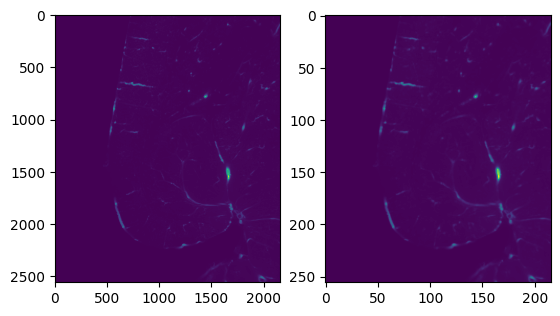

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 00]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 00]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 00]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 00]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 00]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15

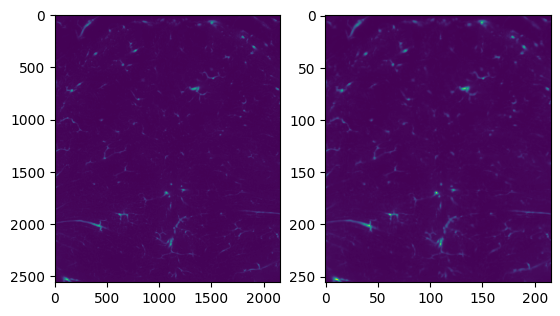

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 01]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 01]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 01]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 01]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 01]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15

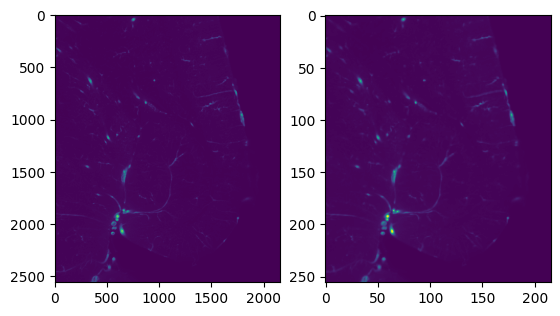

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 02]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 02]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 02]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 02]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[01 x 02]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15

 67%|██████▋   | 2/3 [02:16<01:07, 67.83s/it]

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 00]_C00_xyz-Table Z1000.tif


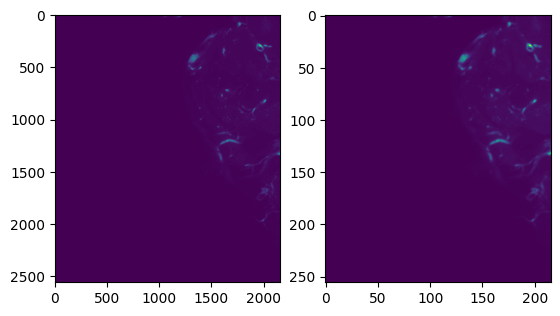

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 00]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 00]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 00]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 00]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 00]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15

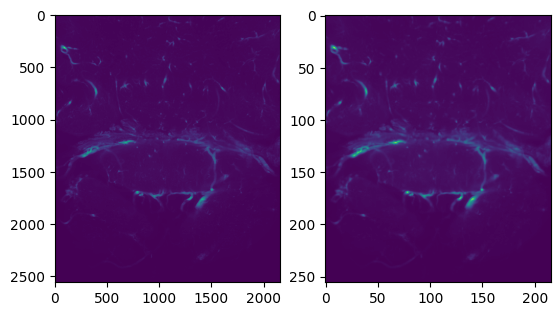

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 01]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 01]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 01]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 01]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 01]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15

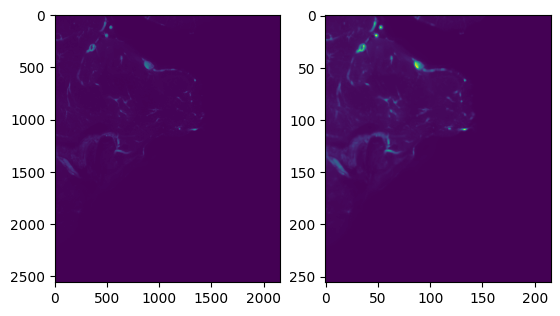

/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 02]_C00_xyz-Table Z1001.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 02]_C00_xyz-Table Z1002.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 02]_C00_xyz-Table Z1003.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 02]_C00_xyz-Table Z1004.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15_Z1000-1009/20-04-14_ax_4x_3umz_3x3_15o_Dyn5_UltraII[02 x 02]_C00_xyz-Table Z1005.tif
/content/drive/MyDrive/Colab Notebooks/BaSiCPy/3DLightsheetfromAli/mouse_brain_raw_scans/CD1-15

100%|██████████| 3/3 [03:25<00:00, 68.51s/it]


In [14]:
imagess = []
coordinatess = []
for subject_path in image_dir.glob("CD*"):
    print(subject_path)
    nrow, ncol = tile_counts[subject_path.name]
    pattern = patterns[subject_path.name]
    image = np.zeros((2, nrow, ncol, 10, 2560, 2160), dtype=np.uint16)  # CMZYX
    image_small = np.zeros((2, nrow, ncol, 10, 256, 216), dtype=np.uint16)  # CMZYX
    for row in tqdm(range(nrow)):
        for col in range(ncol):
            for c in range(2):
                for z in range(10):
                    filename = subject_path / pattern.format(row=row, col=col, c=c, z=z)
                    print(filename)
                    im = imread(filename)
                    image[c, row, col, z] = im
                    new_shape = (256, image.shape[-1] / image.shape[-2] * 256)
                    im2 = transform.resize(
                        im, new_shape, preserve_range=True, anti_aliasing=True
                    )
                    image_small[c, row, col, z] = im2
                    # if (row,col,c,z) == (0,0,0,0):
                    if (c, z) == (0, 0):
                        plt.subplot(121)
                        plt.imshow(im)
                        plt.subplot(122)
                        plt.imshow(im2)
                        plt.show()

    np.save(subject_path / "images.npy", image)
    np.save(subject_path / "images_small.npy", image_small)